In [65]:
import pandas as pd

import matplotlib.pyplot as plt

Este Dataset fue obtenido de la siguiente url: https://benjad.github.io/2015/08/21/base-de-datos-sismos-chile/

El mismo fue obtenido de https://sismologia.cl/

Sus datos van de 2003 a 2015, para obtener los datos de 2015 a 2023 se hizo WebScrapping de la misma web.

In [66]:
#Para importar el primer Dataset de sismos entre 2003 y 2015:
SismosChile1 = pd.read_csv("Datasets/SismosChile2003-2015.csv")

In [67]:
SismosChile1.head(5)

,Fecha localFecha UTC,Unnamed: 1,Latitud,Longitud,Profundidad(Km),Magnitud,Referencia
0,1/1/2003 16:26,1/1/2003 19:26,-34.710,-70.174,0.0,3.1 Mc GUC,76 km al E de San Fernando
1,1/1/2003 14:22,1/1/2003 17:22,-35.112,-71.375,63.1,2.9 Mc GUC3.1 Ml GUC,44 km al NE de Talca
2,1/1/2003 14:02,1/1/2003 17:02,-31.051,-71.310,64.4,2.9 Mc GUC2.5 Ml GUC,33 km al NO de Combarbalá
3,1/1/2003 13:25,1/1/2003 16:25,-30.159,-70.141,5.4,3.3 Mc GUC2.7 Ml GUC,57 km al E de Vicuña
4,1/1/2003 12:54,1/1/2003 15:54,-32.138,-71.753,11.0,3.6 Mc GUC3.3 Ml GUC,60 km al NO de La Ligua


In [68]:
SismosChile1.isnull().sum()

Fecha localFecha UTC    0
Unnamed: 1              0
Latitud                 0
Longitud                0
Profundidad(Km)         0
Magnitud                0
Referencia              0
dtype: int64

In [69]:
#Para renombrar las columnas con errores:
SismosChile1 = SismosChile1.rename(columns={"Fecha localFecha UTC": "Fecha local", "Unnamed: 1":"Fecha UTC"})

In [70]:
SismosChile1

,Fecha local,Fecha UTC,Latitud,Longitud,Profundidad(Km),Magnitud,Referencia
0,1/1/2003 16:26,1/1/2003 19:26,-34.710,-70.174,0.0,3.1 Mc GUC,76 km al E de San Fernando
1,1/1/2003 14:22,1/1/2003 17:22,-35.112,-71.375,63.1,2.9 Mc GUC3.1 Ml GUC,44 km al NE de Talca
2,1/1/2003 14:02,1/1/2003 17:02,-31.051,-71.310,64.4,2.9 Mc GUC2.5 Ml GUC,33 km al NO de Combarbalá
3,1/1/2003 13:25,1/1/2003 16:25,-30.159,-70.141,5.4,3.3 Mc GUC2.7 Ml GUC,57 km al E de Vicuña
4,1/1/2003 12:54,1/1/2003 15:54,-32.138,-71.753,11.0,3.6 Mc GUC3.3 Ml GUC,60 km al NO de La Ligua
...,...,...,...,...,...,...,...
58353,19/8/2015 5:27,19/8/2015 8:27,-23.901,-67.311,231.1,3.2 Ml GUC,68 km al SE de Socaire
58354,19/8/2015 2:54,19/8/2015 5:54,-21.273,-68.616,144.2,3.1 Ml GUC,38 km al O de Ollagüe
58355,19/8/2015 2:54,19/8/2015 5:54,-23.328,-69.713,60.0,2.8 Ml GUC,13 km al E de Baquedano
58356,18/8/2015 23:26,19/8/2015 2:26,-34.508,-72.225,27.0,2.8 Ml GUC,24 km al SO de Pichilemu


A continuación, la transformación del Dataset obtenido a partir de WebScrapping y las transformaciones para correlacionarlo con el primer Dataset.

In [71]:
#Para importar nuestro segundo Dataset con sismos entre 2015 y 2023:
SismosChile2 = pd.read_csv("Datasets/SismosChile2015-2023.csv")

In [72]:
SismosChile2.head(5)

,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN
1,2015-08-19 20:26:0732 km al SE de Calama,2015-08-19 23:26:07,-22.648 -68.686,103 km,2.5 Ml
2,2015-08-19 11:18:0244 km al SE de Pica,2015-08-19 14:18:02,-20.838 -69.119,106 km,2.6 Ml
3,2015-08-19 08:40:52126 km al S de Uyuni,2015-08-19 11:40:52,-21.587 -66.972,230 km,3.5 Ml
4,2015-08-19 07:20:0757 km al S de Mina Collahuasi,2015-08-19 10:20:07,-21.325 -68.793,118 km,2.6 Ml


In [73]:
SismosChile2.isnull().sum()

1    2870
2    2870
3    2870
4    2870
5    2870
dtype: int64

In [74]:
SismosChile2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63010 entries, 0 to 63009
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       60140 non-null  object
 1   2       60140 non-null  object
 2   3       60140 non-null  object
 3   4       60140 non-null  object
 4   5       60140 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB


In [75]:
#Para borrar las filas nulas:
SismosChile2 = SismosChile2.dropna(how='all')

En el Dataset obtenido quedaron columnas anidadas por la estructura de la web.

Las columnas Fecha local y Referencia se encuentran anidadas en una columna y Latitud y Longitud en otra.

Para desanidarlas separé las cadenas de caracteres en base a la cantidad de dígitos.

In [76]:
#Para desanidar las columnas 1 y 3:
SismosChile2["Fecha local"] = SismosChile2["1"].str[:19]

SismosChile2["Referencia"] = SismosChile2["1"].str[19:]

SismosChile2["Latitud"] = SismosChile2["3"].str[:7]

SismosChile2["Longitud"] = SismosChile2["3"].str[8:]

In [77]:
#Para borrar las columnas 1 y 3:
SismosChile2 = SismosChile2.drop(["1", "3"], axis=1)

A continuación renombramos las columnas y quitamos la nomenclatura km de la variable Profundidad.

In [78]:
#Para renombrar las columnas 2, 4 y 5:
SismosChile2 = SismosChile2.rename(columns={"2":"Fecha UTC", "4":"Profundidad(Km)", "5":"Magnitud"})

In [79]:
#Para quitar la nomenclatura km de la columna Profundidad:
SismosChile2["Profundidad(Km)"] = SismosChile2["Profundidad(Km)"].str.replace("km", "")

In [80]:
SismosChile2

,Fecha UTC,Profundidad(Km),Magnitud,Fecha local,Referencia,Latitud,Longitud
1,2015-08-19 23:26:07,103,2.5 Ml,2015-08-19 20:26:07,32 km al SE de Calama,-22.648,-68.686
2,2015-08-19 14:18:02,106,2.6 Ml,2015-08-19 11:18:02,44 km al SE de Pica,-20.838,-69.119
3,2015-08-19 11:40:52,230,3.5 Ml,2015-08-19 08:40:52,126 km al S de Uyuni,-21.587,-66.972
4,2015-08-19 10:20:07,118,2.6 Ml,2015-08-19 07:20:07,57 km al S de Mina Collahuasi,-21.325,-68.793
5,2015-08-19 08:27:00,235,3.2 Ml,2015-08-19 05:27:00,66 km al SE de Socaire,-23.890,-67.329
...,...,...,...,...,...,...,...
63005,2023-06-27 07:00:23,126,3.4 Ml,2023-06-27 03:00:23,50 km al E de Calama,-22.330,-68.467
63006,2023-06-27 06:48:52,62,3.6 Ml,2023-06-27 02:48:52,25 km al O de Combarbalá,-31.118,-71.251
63007,2023-06-27 00:35:14,107,2.9 Ml,2023-06-26 20:35:14,66 km al NE de Pica,-20.018,-68.954
63008,2023-06-27 00:23:01,66,2.9 Ml,2023-06-26 20:23:01,9 km al SO de Antofagasta,-23.693,-70.476


Por último, para poder unir ambos Dataset, respetamos el orden de columnas del primero, por lo que hacemos un index de columnas al segundo con los valores de columns del primero.

In [81]:
#Para normalizar el índice de las dos columnas:
Index = SismosChile1.columns

SismosChile2 = SismosChile2.reindex(columns=Index)

Concatenamos ambos Dataset, reseteamos index de filas y normalizamos fechas transformando a Datetime.

In [82]:
#Para concatenar ambos Datasets:
SismosChile = pd.concat([SismosChile1, SismosChile2])

In [83]:
#Para resetear el índice de las filas:
SismosChile = SismosChile.reset_index(drop=True)

In [84]:
#Para normalizar las columnas Datetime:
SismosChile["Fecha local"] = pd.to_datetime(SismosChile["Fecha local"])

SismosChile["Fecha UTC"] = pd.to_datetime(SismosChile["Fecha UTC"])

In [85]:
SismosChile

,Fecha local,Fecha UTC,Latitud,Longitud,Profundidad(Km),Magnitud,Referencia
0,2003-01-01 16:26:00,2003-01-01 19:26:00,-34.71,-70.174,0.0,3.1 Mc GUC,76 km al E de San Fernando
1,2003-01-01 14:22:00,2003-01-01 17:22:00,-35.112,-71.375,63.1,2.9 Mc GUC3.1 Ml GUC,44 km al NE de Talca
2,2003-01-01 14:02:00,2003-01-01 17:02:00,-31.051,-71.31,64.4,2.9 Mc GUC2.5 Ml GUC,33 km al NO de Combarbalá
3,2003-01-01 13:25:00,2003-01-01 16:25:00,-30.159,-70.141,5.4,3.3 Mc GUC2.7 Ml GUC,57 km al E de Vicuña
4,2003-01-01 12:54:00,2003-01-01 15:54:00,-32.138,-71.753,11.0,3.6 Mc GUC3.3 Ml GUC,60 km al NO de La Ligua
...,...,...,...,...,...,...,...
118493,2023-06-27 03:00:23,2023-06-27 07:00:23,-22.330,-68.467,126,3.4 Ml,50 km al E de Calama
118494,2023-06-27 02:48:52,2023-06-27 06:48:52,-31.118,-71.251,62,3.6 Ml,25 km al O de Combarbalá
118495,2023-06-26 20:35:14,2023-06-27 00:35:14,-20.018,-68.954,107,2.9 Ml,66 km al NE de Pica
118496,2023-06-26 20:23:01,2023-06-27 00:23:01,-23.693,-70.476,66,2.9 Ml,9 km al SO de Antofagasta


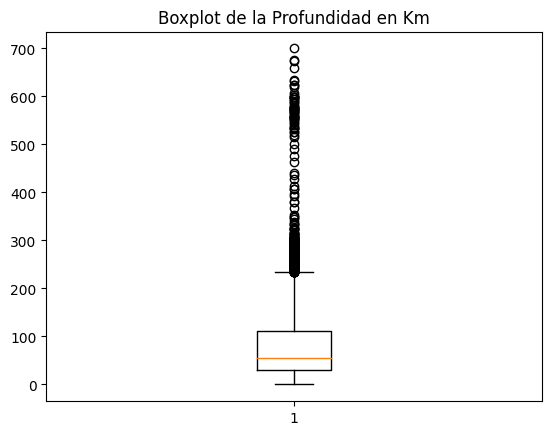

In [86]:
plt.boxplot(SismosChile["Profundidad(Km)"].astype(float))
plt.title('Boxplot de la Profundidad en Km')
plt.show()

Exportamos el Dataset Final.

In [87]:
#Para exportar a csv:
SismosChile.to_csv("Datasets/SismosChileFinal.csv")